In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
df=pd.read_csv('bank_marketing_updated_v1.csv',header=2)

In [ ]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [ ]:
df.shape

(45211, 19)

In [ ]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


**AGE**

In [ ]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [ ]:
freq_dist = df['age'].value_counts()
print(freq_dist)

age
32.0    2085
31.0    1994
33.0    1972
34.0    1929
35.0    1892
        ... 
93.0       2
90.0       2
95.0       2
88.0       2
94.0       1
Name: count, Length: 77, dtype: int64


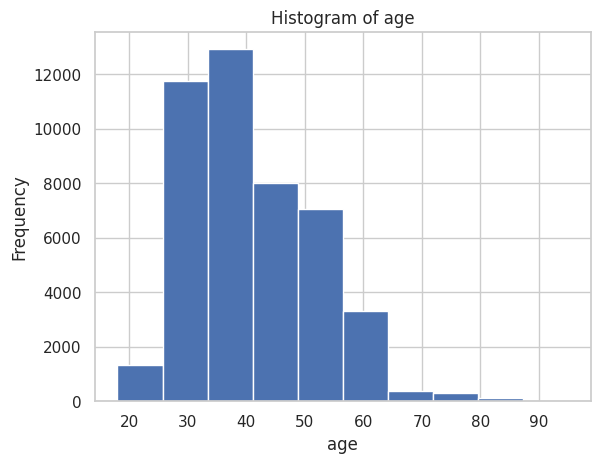

In [ ]:
# Histogram
df['age'].hist()
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

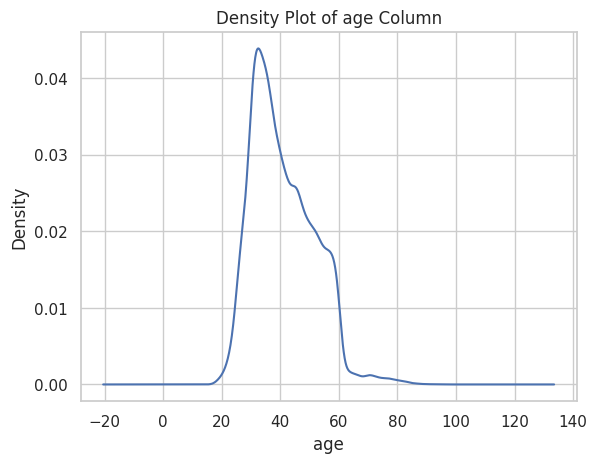

In [ ]:
# Density plot
df['age'].plot(kind='density')
plt.xlabel('age')
plt.title('Density Plot of age Column')
plt.show()

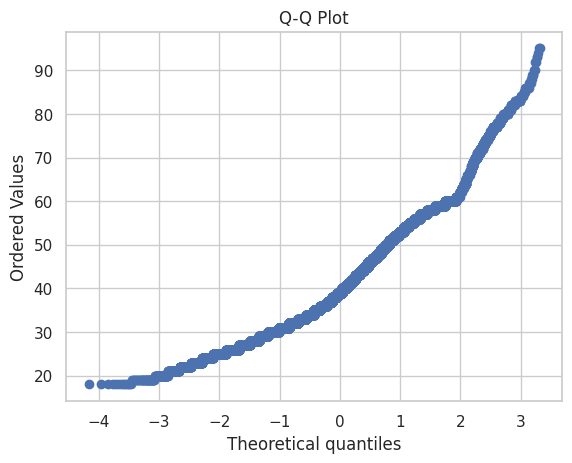

In [ ]:
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
# data = df['age']
# mean = np.mean(data)
# std_dev = np.std(data)

# upper_bound = mean + 3 * std_dev
# lower_bound = mean - 3 * std_dev

# # Identify and cap outliers:
# capped_data = data.copy()
# capped_data = capped_data.apply(lambda x: upper_bound if x > upper_bound else x)
# capped_data = capped_data.apply(lambda x: lower_bound if x < lower_bound else x)

# df['age'] = capped_data

# print("Mean:", mean)
# print("Standard Deviation:", std_dev)
# print("Upper Bound for Outliers:", upper_bound)
# print("Lower Bound for Outliers:", lower_bound)
# print("Capped Data:")
# print(df['age'])

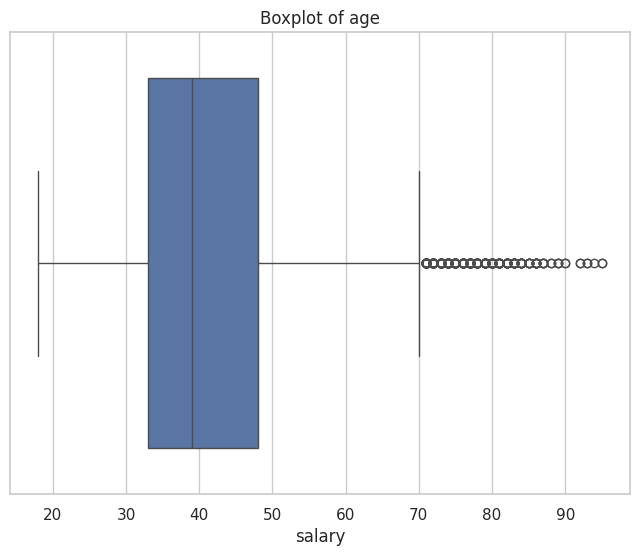

In [ ]:
# Setting style
sns.set(style="whitegrid")

# Drawing boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.xlabel('salary')
plt.show()

**SALARY**

In [ ]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:
# Frequency distribution for a categorical column
freq_dist = df['salary'].value_counts()
print(freq_dist)

salary
20000     9732
100000    9458
60000     9176
50000     5171
70000     4154
55000     2264
120000    1487
8000      1303
16000     1240
4000       938
0          288
Name: count, dtype: int64


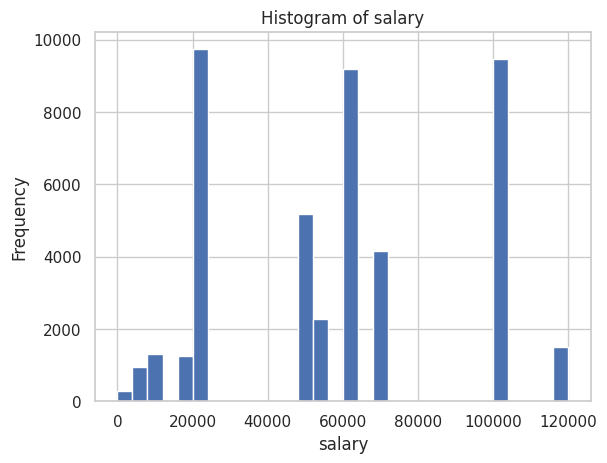

In [ ]:
# Histogram
df['salary'].hist(bins=30)
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.title('Histogram of salary')
plt.show()

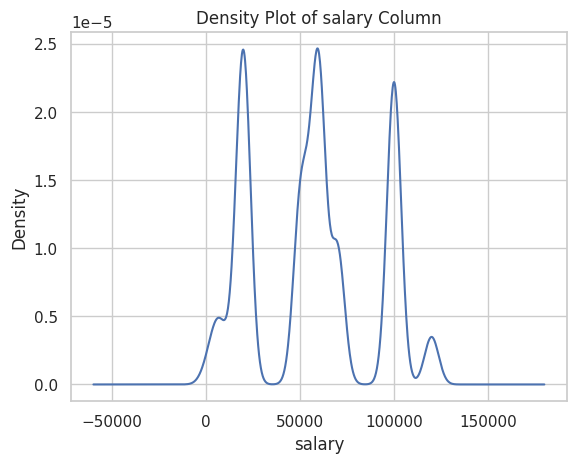

In [ ]:
# Density plot
df['salary'].plot(kind='density')
plt.xlabel('salary')
plt.title('Density Plot of salary Column')
plt.show()

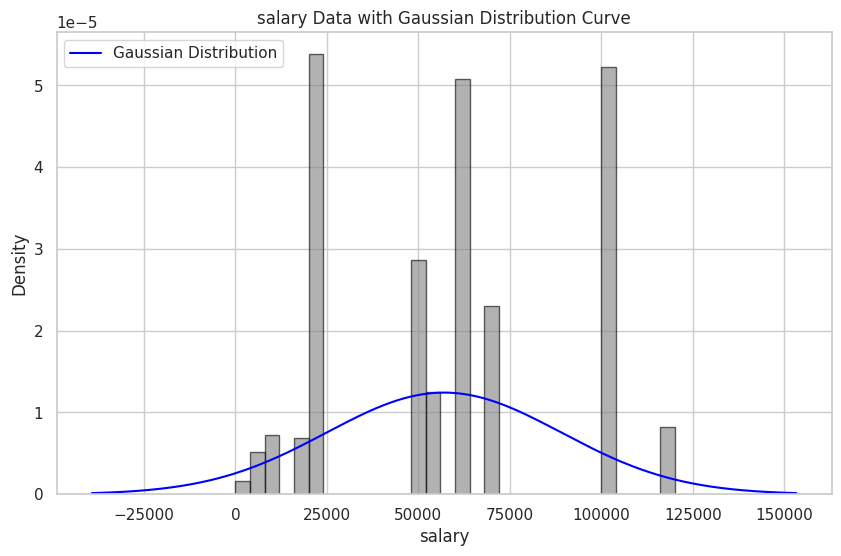

In [ ]:
salary = df['salary']

# Calculate the mean and standard deviation of the salary data
mean = salary.mean()
std_dev = salary.std()

# Generate x values for plotting
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Generate y values based on Gaussian (normal) distribution
y = norm.pdf(x, mean, std_dev)

# Plot the histogram of the salary data
plt.figure(figsize=(10, 6))
plt.hist(salary, bins=30, density=True, alpha=0.6, color='gray', edgecolor='black')

# Plot the Gaussian distribution curve
plt.plot(x, y, label='Gaussian Distribution', color='blue')
plt.title('salary Data with Gaussian Distribution Curve')
plt.xlabel('salary')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

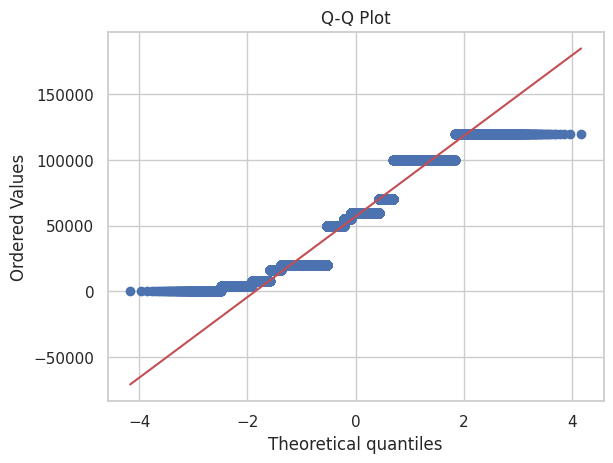

In [ ]:
stats.probplot(df['salary'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

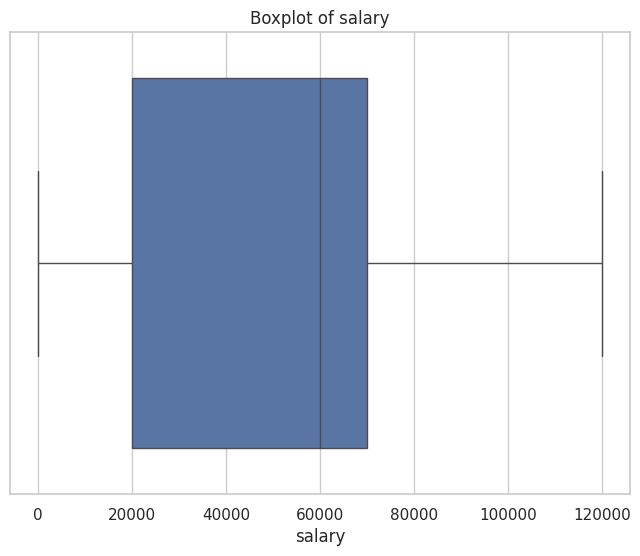

In [ ]:
# Setting style
sns.set(style="whitegrid")

# Drawing boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary'])
plt.title('Boxplot of salary')
plt.xlabel('salary')
plt.show()

**BALANCE**

In [ ]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:
# Frequency distribution for a categorical column
freq_dist = df['balance'].value_counts()
print(freq_dist)

balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64


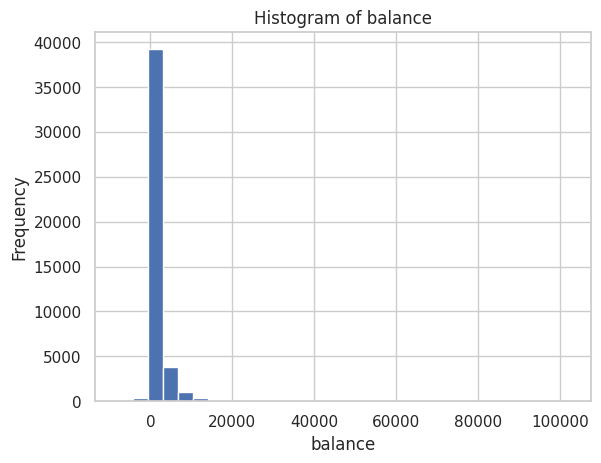

In [ ]:
# Histogram
df['balance'].hist(bins=30)
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.title('Histogram of balance')
plt.show()

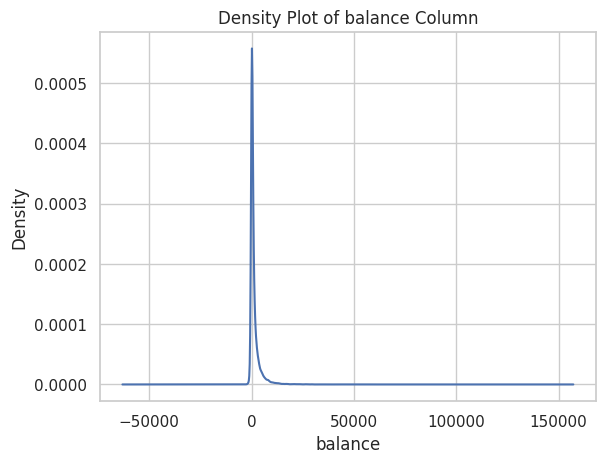

In [ ]:
# Density plot
df['balance'].plot(kind='density')
plt.xlabel('balance')
plt.title('Density Plot of balance Column')
plt.show()

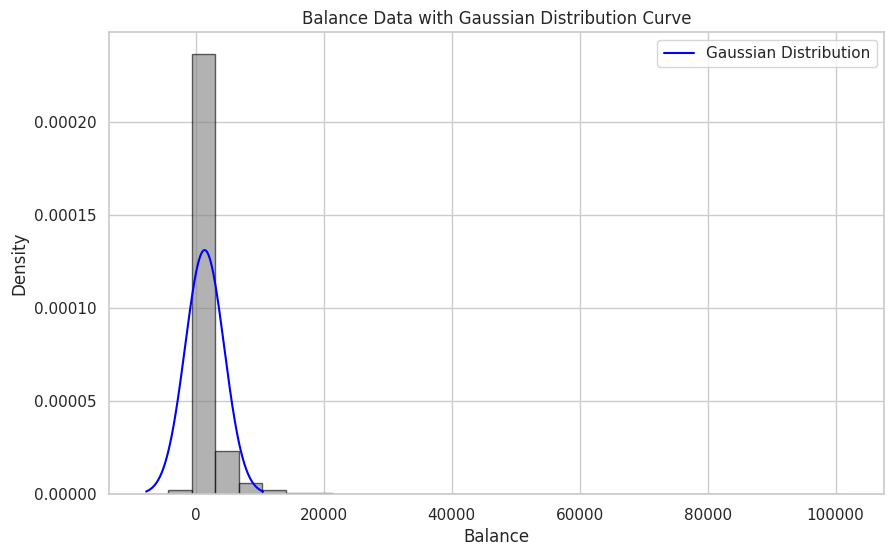

In [ ]:
balance = df['balance']

# Calculate the mean and standard deviation of the balance data
mean = balance.mean()
std_dev = balance.std()

# Generate x values for plotting
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Generate y values based on Gaussian (normal) distribution
y = norm.pdf(x, mean, std_dev)

# Plot the histogram of the balance data
plt.figure(figsize=(10, 6))
plt.hist(balance, bins=30, density=True, alpha=0.6, color='gray', edgecolor='black')

# Plot the Gaussian distribution curve
plt.plot(x, y, label='Gaussian Distribution', color='blue')
plt.title('Balance Data with Gaussian Distribution Curve')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = df['balance']
mean = np.mean(data)
std_dev = np.std(data)

upper_bound = mean + 3 * std_dev
lower_bound = mean - 3 * std_dev

outliers_above = df[df['balance'] > upper_bound]['balance']
outliers_below = df[df['balance'] < lower_bound]['balance']
print(outliers_above)
print(outliers_below)
# Identify and cap outliers:
capped_data = data.copy()
capped_data = capped_data.apply(lambda x: upper_bound if x > upper_bound else x)
capped_data = capped_data.apply(lambda x: lower_bound if x < lower_bound else x)

df['balance'] = capped_data

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Upper Bound for Outliers:", upper_bound)
print("Lower Bound for Outliers:", lower_bound)

34       10635
69       12223
334      24598
446      45248
920      58544
         ...  
45075    11862
45097    10861
45098    11115
45118    14204
45127    16353
Name: balance, Length: 744, dtype: int64
12909   -8019
Name: balance, dtype: int64
Mean: 1362.2720576850766
Standard Deviation: 3044.7321561391027
Upper Bound for Outliers: 10496.468526102384
Lower Bound for Outliers: -7771.92441073223


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  float64
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

**MARITAL**

In [ ]:
freq_dist = df['marital'].value_counts()
print(freq_dist)

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


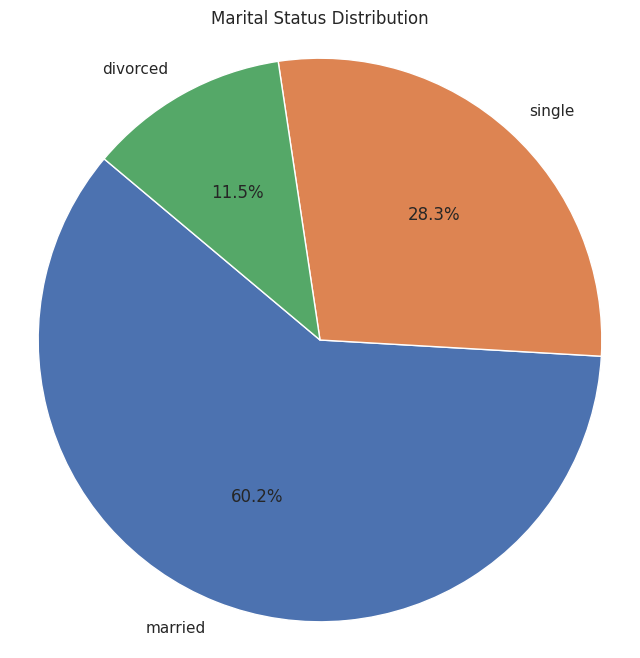

In [ ]:
freq_dist = df['marital'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


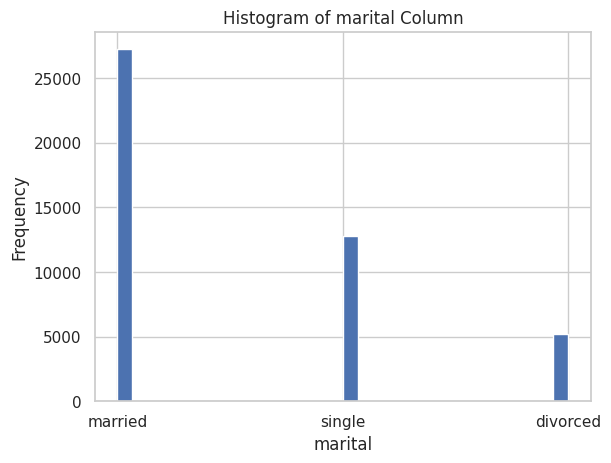

In [ ]:
import matplotlib.pyplot as plt

# Histogram
df['marital'].hist(bins=30)
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.title('Histogram of marital Column')
plt.show()


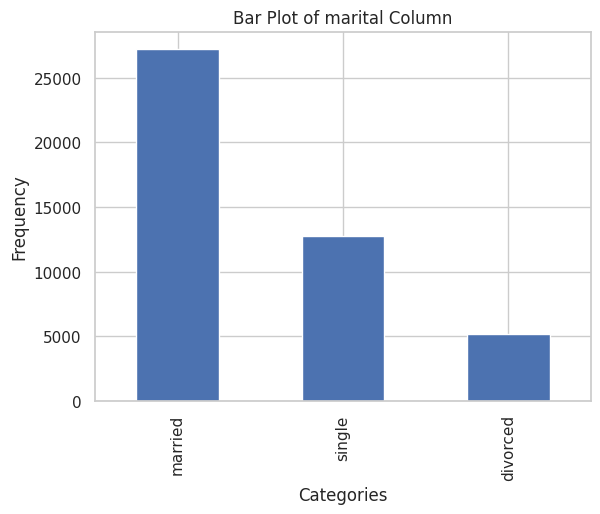

In [ ]:
# Bar plot
df['marital'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of marital Column')
plt.show()


**TARGET**

In [ ]:
freq_dist = df['targeted'].value_counts()
print(freq_dist)

targeted
yes    37091
no      8120
Name: count, dtype: int64


In [ ]:
freq_dist = df['targeted'].value_counts()

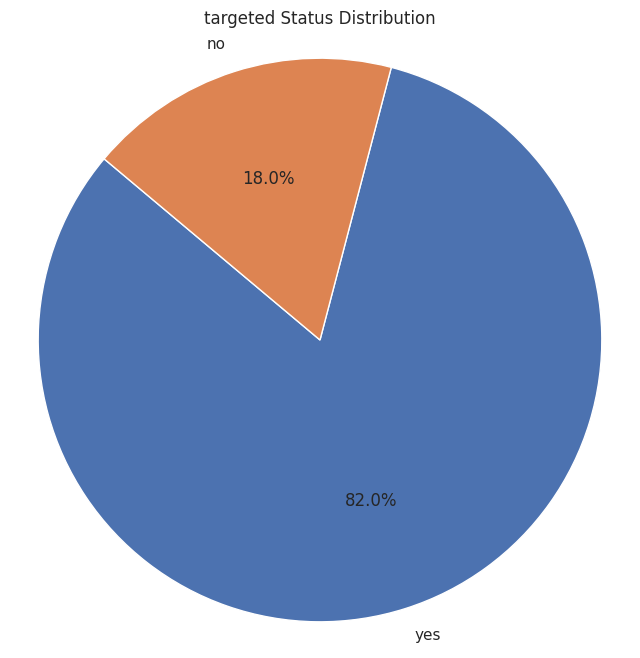

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('targeted Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

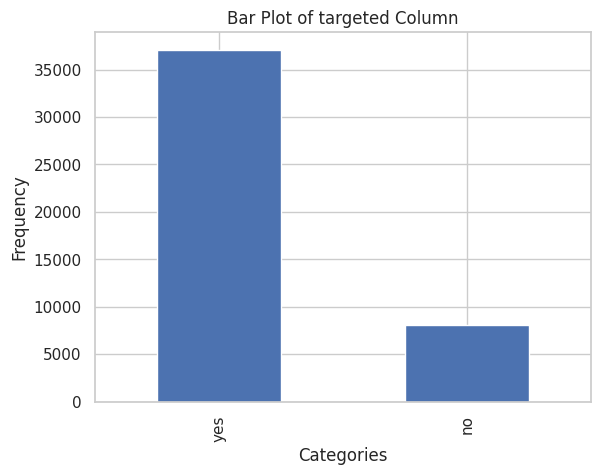

In [ ]:
# Bar plot
df['targeted'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of targeted Column')
plt.show()

In [ ]:
freq_dist = df['default'].value_counts()
print(freq_dist)

default
no     44396
yes      815
Name: count, dtype: int64


In [ ]:
freq_dist = df['default'].value_counts()

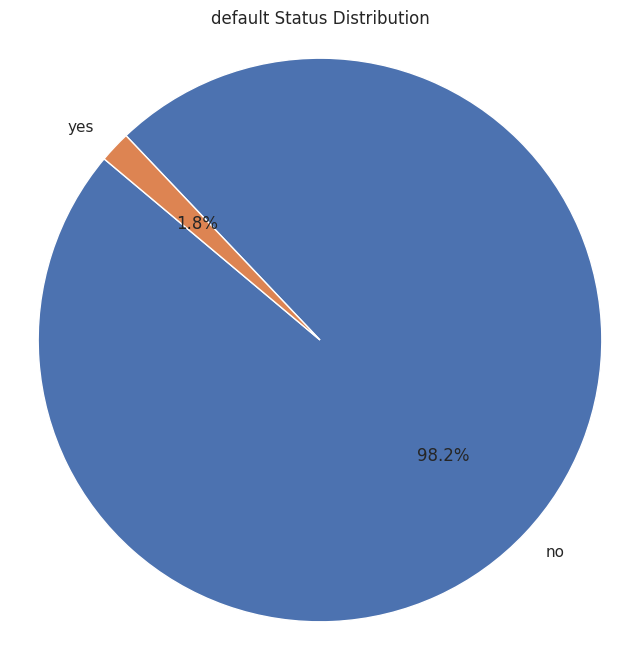

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('default Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

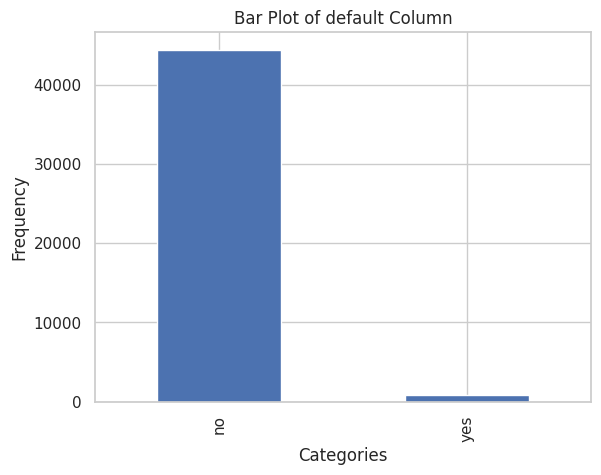

In [ ]:
# Bar plot
df['default'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of default Column')
plt.show()

In [ ]:
freq_dist = df['housing'].value_counts()
print(freq_dist)

housing
yes    25130
no     20081
Name: count, dtype: int64


In [ ]:
freq_dist = df['housing'].value_counts()

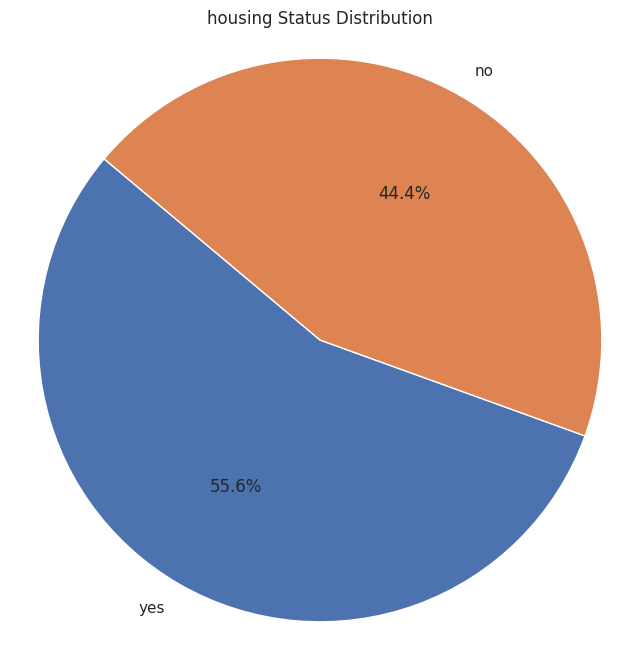

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('housing Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

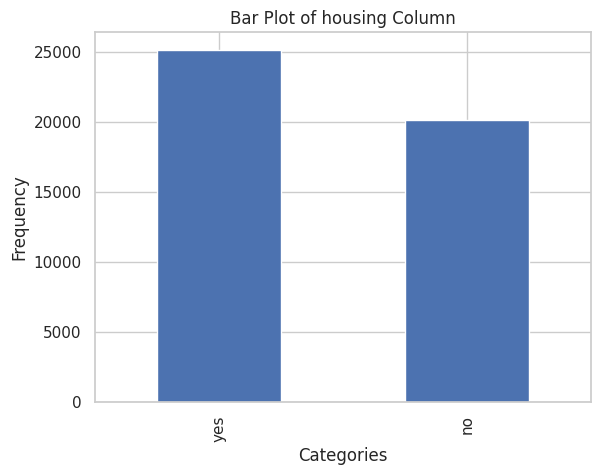

In [ ]:
# Bar plot
df['housing'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of housing Column')
plt.show()

**LOAN**

In [ ]:
freq_dist = df['loan'].value_counts()
print(freq_dist)

loan
no     37967
yes     7244
Name: count, dtype: int64


In [ ]:
freq_dist = df['loan'].value_counts()

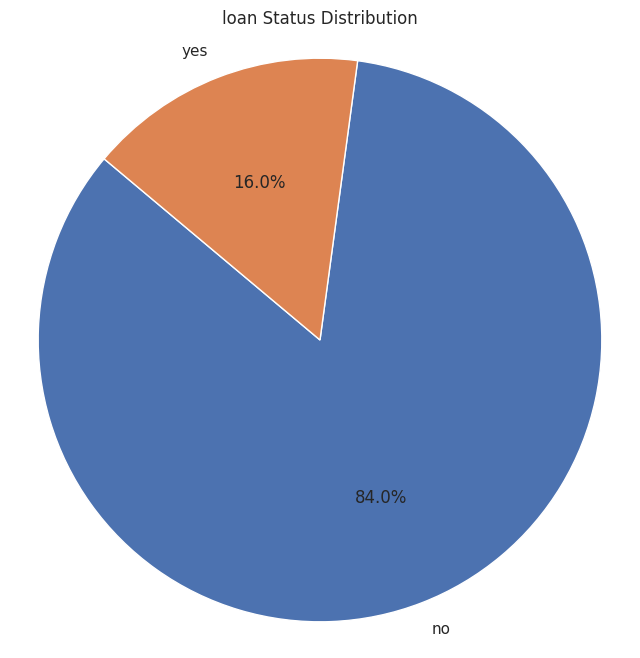

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

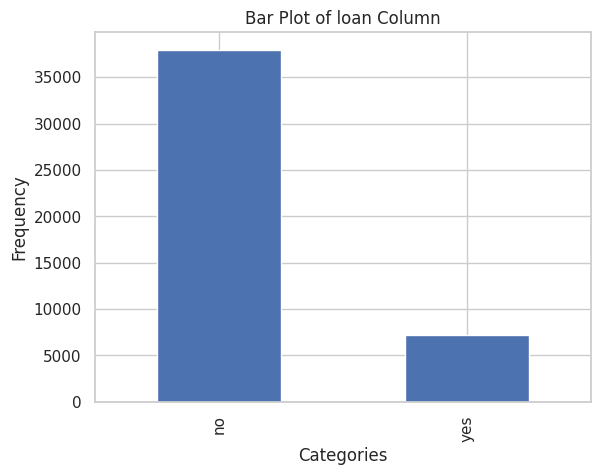

In [ ]:
# Bar plot
df['loan'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of loan Column')
plt.show()

**Contact**

In [ ]:
freq_dist = df['contact'].value_counts()
print(freq_dist)

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


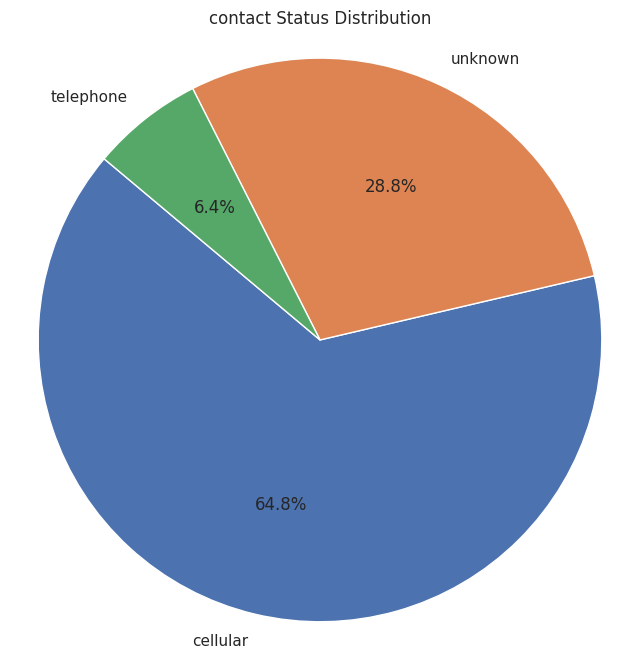

In [ ]:

freq_dist = df['contact'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('contact Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

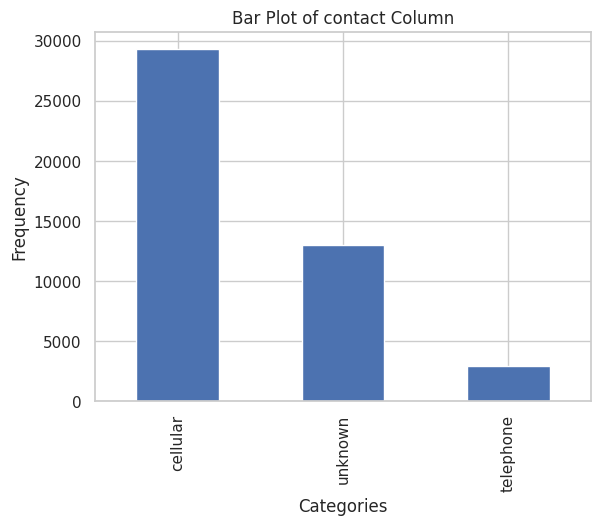

In [ ]:
# Bar plot
df['contact'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of contact Column')
plt.show()

**DAY**

In [ ]:
freq_dist = df['day'].value_counts()
print(freq_dist)

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64


In [ ]:

freq_dist = df['day'].value_counts()

In [ ]:

# # Plotting the pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
# plt.title('day Status Distribution')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()


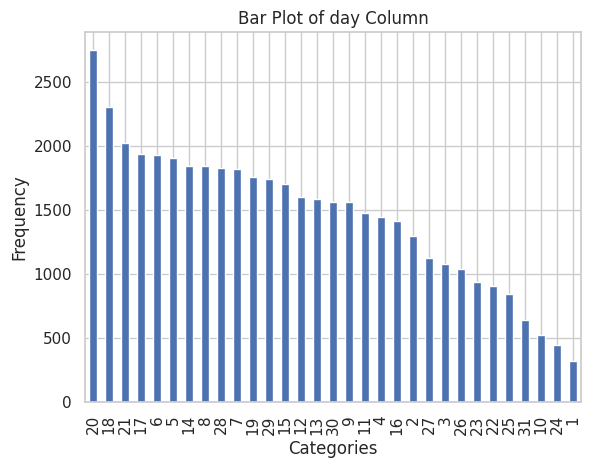

In [ ]:
# Bar plot
df['day'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of day Column')
plt.show()

**CAMPAIGN**

In [ ]:
freq_dist = df['campaign'].value_counts()
print(freq_dist)

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64


In [ ]:
percentage_allocation = df['campaign'].value_counts(normalize=True) * 100

# Convert to DataFrame for better display
percentage_table = percentage_allocation.reset_index()
percentage_table.columns = ['campaign', 'Percentage Allocation']

# Print the percentage allocation table
print(percentage_table)

    campaign  Percentage Allocation
0          1              38.804716
1          2              27.659198
2          3              12.211630
3          4               7.790140
4          5               3.901705
5          6               2.855500
6          7               1.625711
7          8               1.194400
8          9               0.723275
9         10               0.588352
10        11               0.444582
11        12               0.342837
12        13               0.294176
13        14               0.205702
14        15               0.185795
15        16               0.174736
16        17               0.152618
17        18               0.112804
18        19               0.097321
19        20               0.095110
20        21               0.077415
21        22               0.050873
22        25               0.048661
23        23               0.048661
24        24               0.044237
25        29               0.035390
26        28               0

**pdays**

In [ ]:
x=df['pdays'].describe()
print("Min:",x['min'],"Max:",x['max'],"Mean:",x['mean'])

Min: -1.0 Max: 871.0 Mean: 40.19782796222158


In [ ]:
freq_dist = df['pdays'].value_counts()
print(freq_dist)

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64


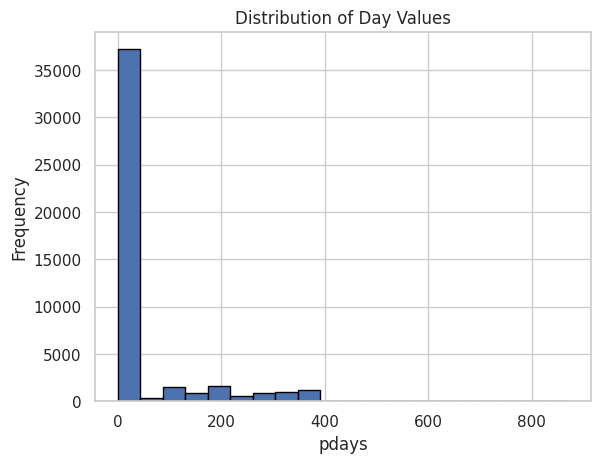

In [ ]:
plt.hist(df['pdays'], bins=20, edgecolor='black')

# Add title and labels
plt.title('Distribution of Day Values')
plt.xlabel('pdays')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**PREVIOUS**

In [ ]:
x=df['previous'].describe()
print("Min:",x['min'],"Max:",x['max'],"Mean:",x['mean'])

Min: 0.0 Max: 275.0 Mean: 0.5803233726305546


In [ ]:
freq_dist = df['previous'].value_counts()
print(freq_dist)

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


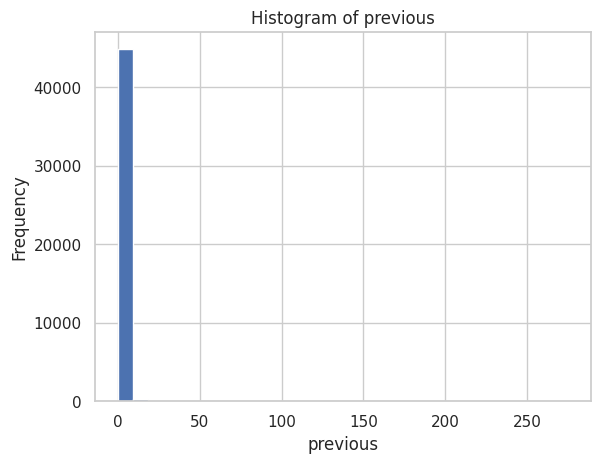

In [ ]:

# Histogram
df['previous'].hist(bins=30)
plt.xlabel('previous')
plt.ylabel('Frequency')
plt.title('Histogram of previous')
plt.show()




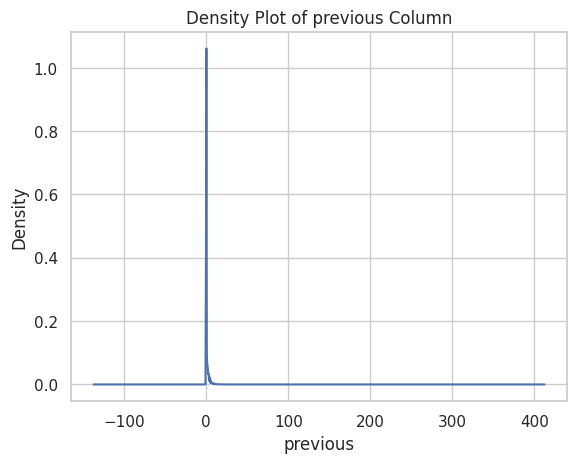

In [ ]:

# Density plot
df['previous'].plot(kind='density')
plt.xlabel('previous')
plt.title('Density Plot of previous Column')
plt.show()


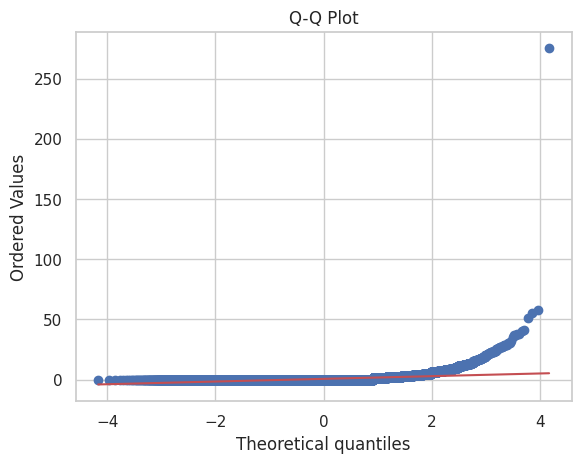

In [ ]:

stats.probplot(df['previous'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


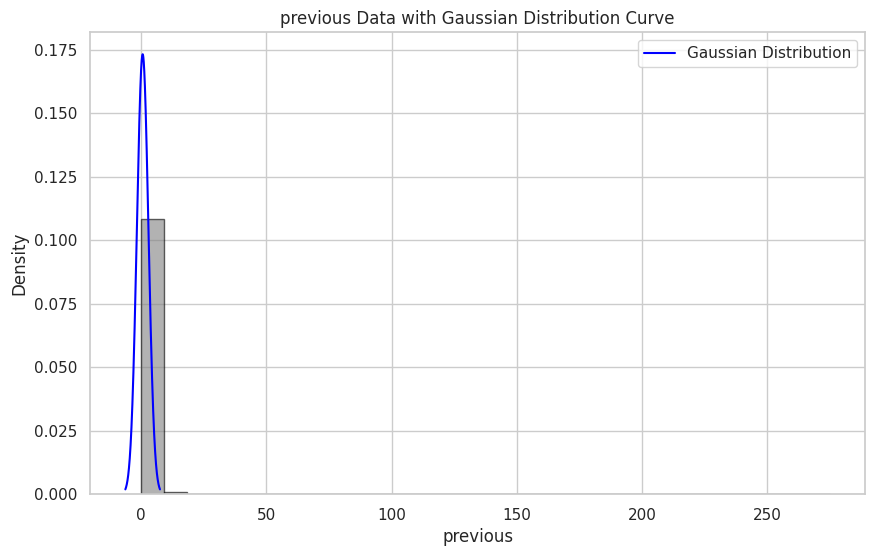

In [ ]:
previous = df['previous']

# Calculate the mean and standard deviation of the previous data
mean = previous.mean()
std_dev = previous.std()

# Generate x values for plotting
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Generate y values based on Gaussian (normal) distribution
y = norm.pdf(x, mean, std_dev)

# Plot the histogram of the previous data
plt.figure(figsize=(10, 6))
plt.hist(previous, bins=30, density=True, alpha=0.6, color='gray', edgecolor='black')

# Plot the Gaussian distribution curve
plt.plot(x, y, label='Gaussian Distribution', color='blue')
plt.title('previous Data with Gaussian Distribution Curve')
plt.xlabel('previous')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = df['previous']
mean = np.mean(data)
std_dev = np.std(data)

upper_bound = mean + 3 * std_dev
lower_bound = mean - 3 * std_dev

outliers = data[(data > upper_bound) | (data < lower_bound)]
print(outliers)

# Identify and cap outliers:
capped_data = data.copy()
capped_data = capped_data.apply(lambda x: upper_bound if x > upper_bound else x)
capped_data = capped_data.apply(lambda x: lower_bound if x < lower_bound else x)

df['previous'] = capped_data

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Upper Bound for Outliers:", upper_bound)
print("Lower Bound for Outliers:", lower_bound)
df['previous']=df['previous'].astype(int)
print(df['previous'])

24136    11
24295    16
24331    10
24506    10
24556    12
         ..
45171    16
45172     8
45199    12
45204     8
45210    11
Name: previous, Length: 582, dtype: int64
Mean: 0.5803233726305546
Standard Deviation: 2.303415570447332
Upper Bound for Outliers: 7.490570083972551
Lower Bound for Outliers: -6.329923338711441
0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    3
45209    0
45210    7
Name: previous, Length: 45211, dtype: int64


**poutcome**

In [ ]:
freq_dist = df['poutcome'].value_counts()
print(freq_dist)

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


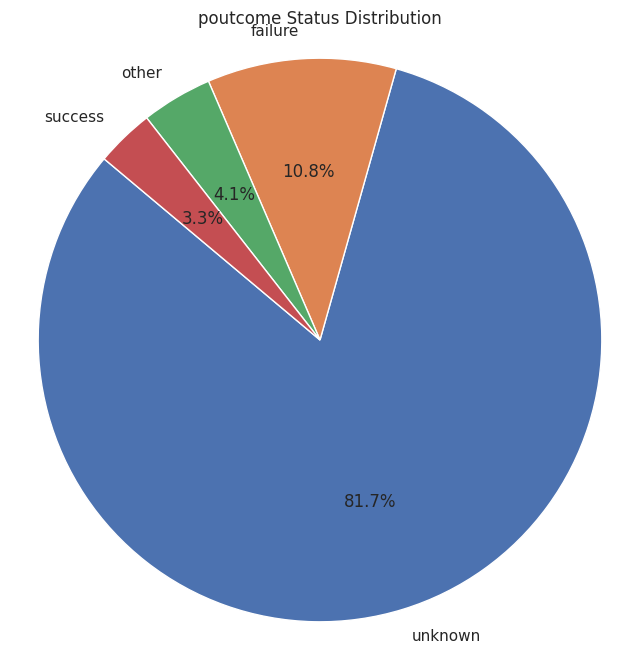

In [ ]:


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('poutcome Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


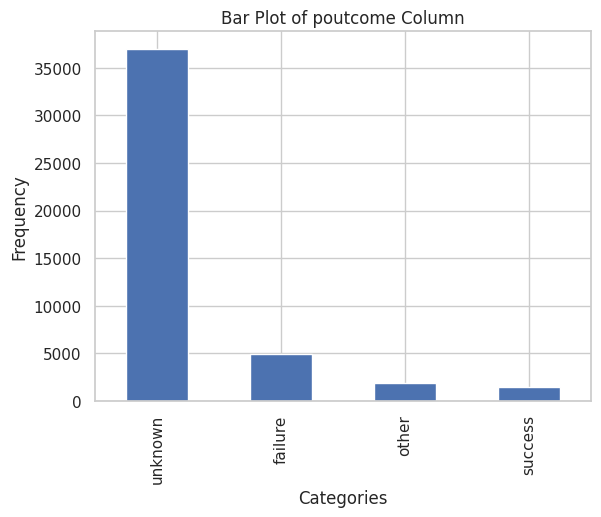

In [ ]:
# Bar plot
df['poutcome'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of poutcome Column')
plt.show()

**Response**

In [ ]:
freq_dist = df['response'].value_counts()
print(freq_dist)

response
no     39894
yes     5287
Name: count, dtype: int64


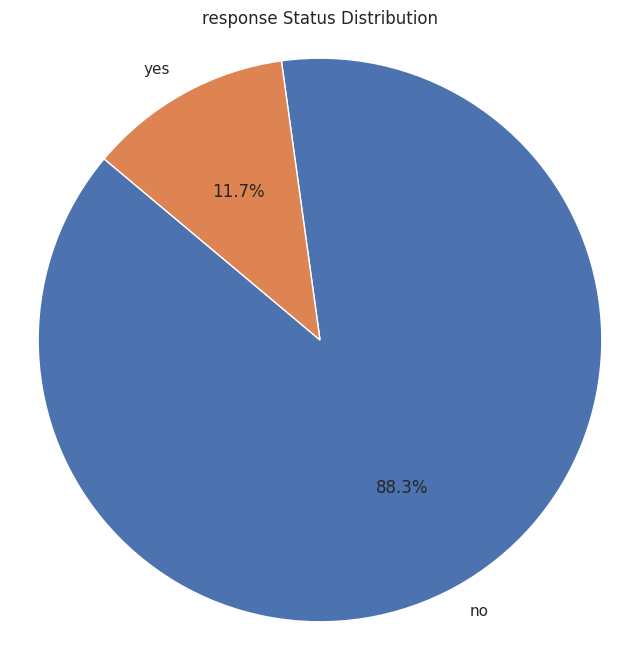

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('response Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

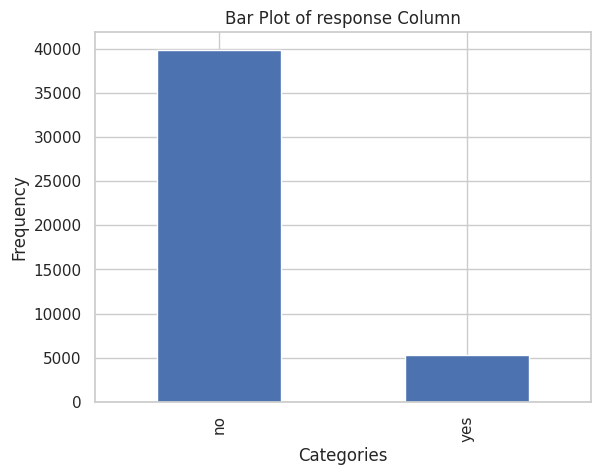

In [ ]:
# Bar plot
df['response'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of response Column')
plt.show()

PRE-PROCESSING

In [ ]:
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Split the Duration Column into Numeric Value


In [ ]:
x=df['duration'].str.split(" ",expand=True)
print(type(x))
print(x[1].value_counts())
#since we have only 2 types of unit(we will convert min to sec)
x[0] = x[0].astype(float)
x.loc[x[1] == 'min', 0] *= 60

df['duration']=x[0]

<class 'pandas.core.frame.DataFrame'>
1
min    31096
sec    14115
Name: count, dtype: int64


In [ ]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143.0,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no
1,2,44.0,60000,29.0,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no
2,3,33.0,120000,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no
3,4,47.0,20000,1506.0,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no
4,5,33.0,0,1.0,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825.0,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",977.0,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729.0,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",456.0,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715.0,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",1127.0,5,184,3,success,yes
45209,45210,57.0,20000,668.0,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",508.0,4,-1,0,unknown,no


In [ ]:
df[['job','education']]=df['jobedu'].str.split(',',expand=True)
df.drop(columns=['jobedu'],inplace=True)

df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506.0,married,no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1.0,single,no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825.0,married,yes,no,no,no,cellular,17,"nov, 2017",977.0,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71.0,55000,1729.0,divorced,yes,no,no,no,cellular,17,"nov, 2017",456.0,2,-1,0,unknown,yes,retired,primary
45208,45209,72.0,55000,5715.0,married,yes,no,no,no,cellular,17,"nov, 2017",1127.0,5,184,3,success,yes,retired,secondary
45209,45210,57.0,20000,668.0,married,yes,no,no,no,telephone,17,"nov, 2017",508.0,4,-1,0,unknown,no,blue-collar,secondary


In [ ]:
#Month column has 50 null values.

df[['month', 'year']] = df['month'].apply(lambda x: pd.Series(str(x).split(',')))
df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,job,education,year
0,1,58.0,100000,2143.0,married,yes,no,yes,no,unknown,...,may,261.0,1,-1,0,unknown,no,management,tertiary,2017
1,2,44.0,60000,29.0,single,yes,no,yes,no,unknown,...,may,151.0,1,-1,0,unknown,no,technician,secondary,2017
2,3,33.0,120000,2.0,married,yes,no,yes,yes,unknown,...,may,76.0,1,-1,0,unknown,no,entrepreneur,secondary,2017
3,4,47.0,20000,1506.0,married,no,no,yes,no,unknown,...,may,92.0,1,-1,0,unknown,no,blue-collar,unknown,2017
4,5,33.0,0,1.0,single,no,no,no,no,unknown,...,may,198.0,1,-1,0,unknown,no,unknown,unknown,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825.0,married,yes,no,no,no,cellular,...,nov,977.0,3,-1,0,unknown,yes,technician,tertiary,2017
45207,45208,71.0,55000,1729.0,divorced,yes,no,no,no,cellular,...,nov,456.0,2,-1,0,unknown,yes,retired,primary,2017
45208,45209,72.0,55000,5715.0,married,yes,no,no,no,cellular,...,nov,1127.0,5,184,3,success,yes,retired,secondary,2017
45209,45210,57.0,20000,668.0,married,yes,no,no,no,telephone,...,nov,508.0,4,-1,0,unknown,no,blue-collar,secondary,2017


In [ ]:
df['month'].value_counts()

month
may    13747
jul     6888
aug     6240
jun     5335
nov     3968
apr     2931
feb     2646
jan     1402
oct      738
sep      576
mar      476
dec      214
nan       50
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  float64
 4   marital     45211 non-null  object 
 5   targeted    45211 non-null  object 
 6   default     45211 non-null  object 
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  month       45211 non-null  object 
 12  duration    45211 non-null  float64
 13  campaign    45211 non-null  int64  
 14  pdays       45211 non-null  int64  
 15  previous    45211 non-null  int64  
 16  poutcome    45211 non-null  object 
 17  response    45181 non-null  object 
 18  job         45211 non-null  object 
 19  education   45211 non-nul

In [ ]:
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
year          50
dtype: int64

In [ ]:
df=df[df['response'].notna()]
df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,job,education,year
0,1,58.0,100000,2143.0,married,yes,no,yes,no,unknown,...,may,261.0,1,-1,0,unknown,no,management,tertiary,2017
1,2,44.0,60000,29.0,single,yes,no,yes,no,unknown,...,may,151.0,1,-1,0,unknown,no,technician,secondary,2017
2,3,33.0,120000,2.0,married,yes,no,yes,yes,unknown,...,may,76.0,1,-1,0,unknown,no,entrepreneur,secondary,2017
3,4,47.0,20000,1506.0,married,no,no,yes,no,unknown,...,may,92.0,1,-1,0,unknown,no,blue-collar,unknown,2017
4,5,33.0,0,1.0,single,no,no,no,no,unknown,...,may,198.0,1,-1,0,unknown,no,unknown,unknown,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825.0,married,yes,no,no,no,cellular,...,nov,977.0,3,-1,0,unknown,yes,technician,tertiary,2017
45207,45208,71.0,55000,1729.0,divorced,yes,no,no,no,cellular,...,nov,456.0,2,-1,0,unknown,yes,retired,primary,2017
45208,45209,72.0,55000,5715.0,married,yes,no,no,no,cellular,...,nov,1127.0,5,184,3,success,yes,retired,secondary,2017
45209,45210,57.0,20000,668.0,married,yes,no,no,no,telephone,...,nov,508.0,4,-1,0,unknown,no,blue-collar,secondary,2017


In [ ]:
df.loc[df['age'].isnull(),'age']=df['age'].mean()
df.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response       0
job            0
education      0
year          50
dtype: int64

In [ ]:
df.dtypes

customerid      int64
age           float64
salary          int64
balance       float64
marital        object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration      float64
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
job            object
education      object
year           object
dtype: object

In [ ]:
df['age']=df['age'].astype('int')
df['duration']=df['duration'].astype('float')
df.dtypes

<ipython-input-337-991d313ec7ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].astype('int')
<ipython-input-337-991d313ec7ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration']=df['duration'].astype('float')


customerid      int64
age             int64
salary          int64
balance       float64
marital        object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration      float64
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
job            object
education      object
year           object
dtype: object

In [ ]:
df.describe()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,22606.307253,40.935349,57005.046369,1239.569015,15.807153,258.147717,2.763352,40.198601,0.502778
std,13051.461021,10.616457,32089.163369,2085.827445,8.322919,257.551174,3.096578,100.134050,1.342539
min,1.000000,18.000000,0.000000,-7771.924411,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11304.000000,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33909.000000,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,10496.468526,31.000000,4918.000000,63.000000,871.000000,7.000000


In [ ]:
# df['month'].value_counts()

In [ ]:
x = df.groupby('month')['year']
xy = x.value_counts()

xy

month  year 
apr     2017     2929
aug     2017     6235
dec     2017      214
feb     2017     2645
jan     2017     1402
jul     2017     6886
jun     2017     5329
mar     2017      476
may     2017    13738
nov     2017     3963
oct     2017      738
sep     2017      576
Name: count, dtype: int64

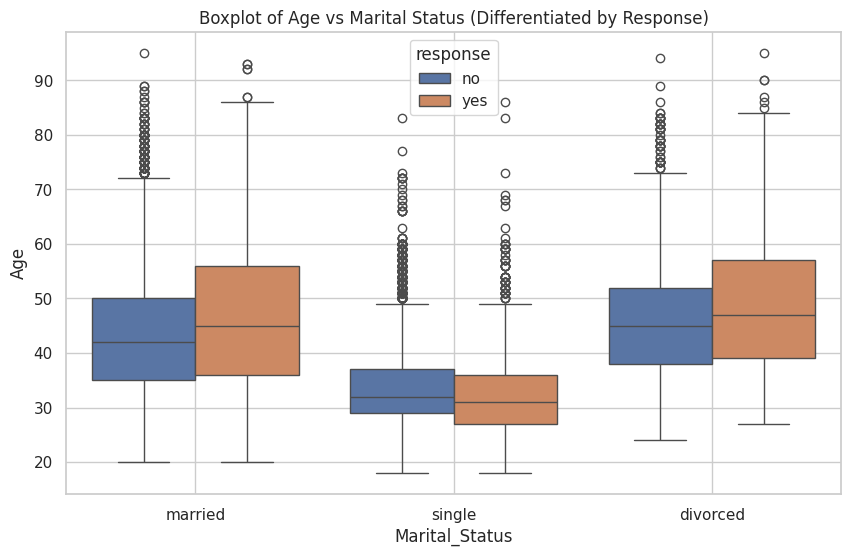

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='age', hue='response', data=df)

plt.xlabel('Marital_Status')
plt.ylabel('Age')
plt.title('Boxplot of Age vs Marital Status (Differentiated by Response)')
plt.legend(title='response')

plt.grid(True)
plt.show()




#Inference:
# 1. For all types of category within marital_status outliers lie at the right side.(married,divorced:after 70 years, single: after 50 years)
# 2. Line in the inside box represent median.
# 3. For each of them Q1, Q3 can be mapped.

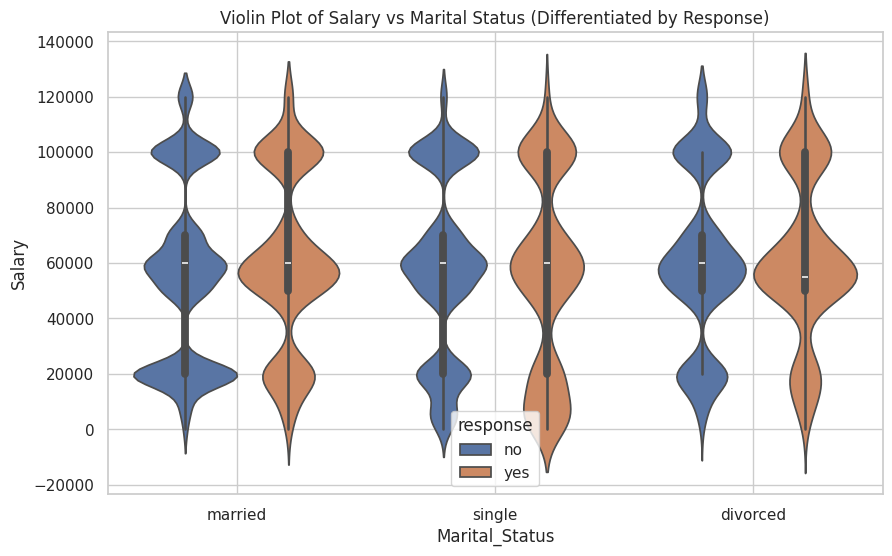

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='marital',y='salary',hue='response',data=df)

plt.xlabel('Marital_Status')
plt.ylabel('Salary')
plt.title('Violin Plot of Salary vs Marital Status (Differentiated by Response)')
plt.legend(title='response')

plt.grid(True)
plt.show()

#inference:
# Outer line of plots represent density of the data.
# Eg. density seen at 20000,60000,100000 salary

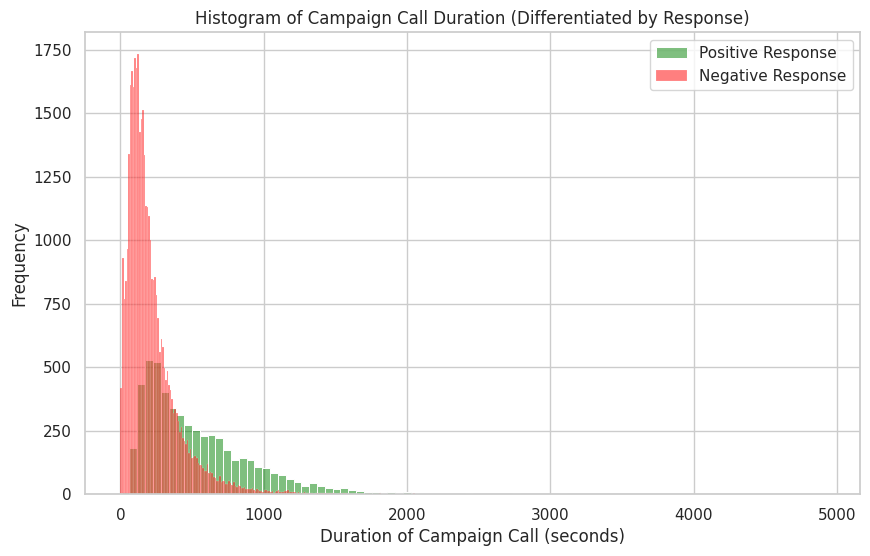

In [ ]:
positive_responses = df[df['response'] == 'yes']
negative_responses = df[df['response'] == 'no']
plt.figure(figsize=(10, 6))
sns.histplot(positive_responses['duration'], color='green', alpha=0.5, label='Positive Response')
sns.histplot(negative_responses['duration'], color='red', alpha=0.5, label='Negative Response')

plt.xlabel('Duration of Campaign Call (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Campaign Call Duration (Differentiated by Response)')
plt.legend()

plt.grid(True)
plt.show()

#Inference:
# Duration of call is more concentrated over left part that is - very low duration - for Negative Response

response     no  yes
month               
apr        2352  577
aug        5547  688
dec         114  100
feb        2206  439
jan        1260  142
jul        6260  626
jun        4785  544
mar         229  247
may       12814  924
nan          44    6
nov        3560  403
oct         415  323
sep         308  268


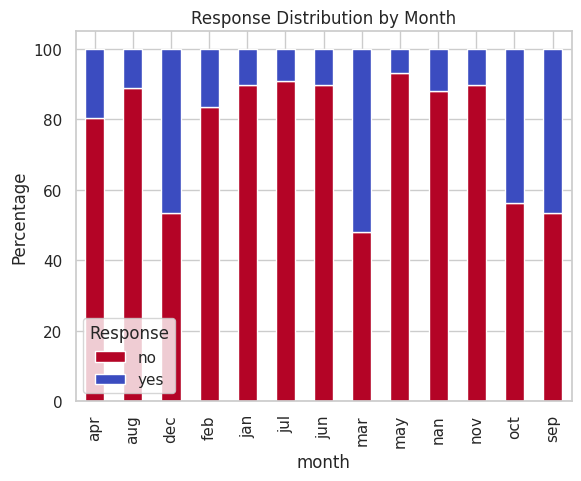

In [ ]:
# Count the occurrences of 'Yes' and 'No' for each month
grouped = df.groupby(['month', 'response']).size().unstack(fill_value=0)
print(grouped)

# Calculate the percentage for each month
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

ax = grouped_percentage.plot(kind='bar', stacked=True, colormap='coolwarm_r')

ax.set_ylabel('Percentage')
ax.set_title('Response Distribution by Month')
ax.legend(title='Response')

plt.show()

#Inference:
# Most response yes in March and September
#Least in May month.

<ipython-input-345-5537cbe3d307>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df, palette='Set2')


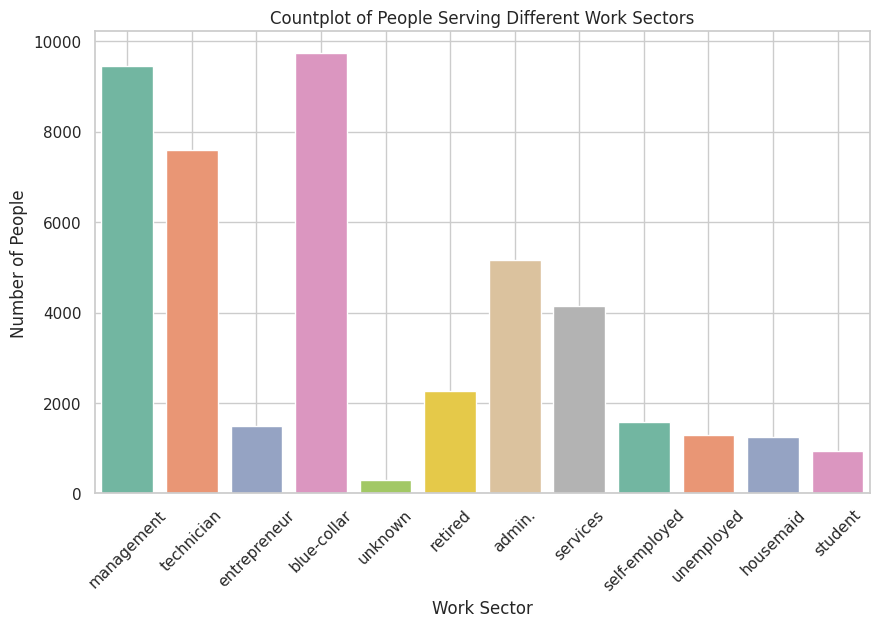

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df, palette='Set2')

plt.xlabel('Work Sector')
plt.ylabel('Number of People')
plt.title('Countplot of People Serving Different Work Sectors')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

#Inference:
# majority of people are in blue collared jobs and management side
# count is low toward student, housemaid,unemployed,self-employed

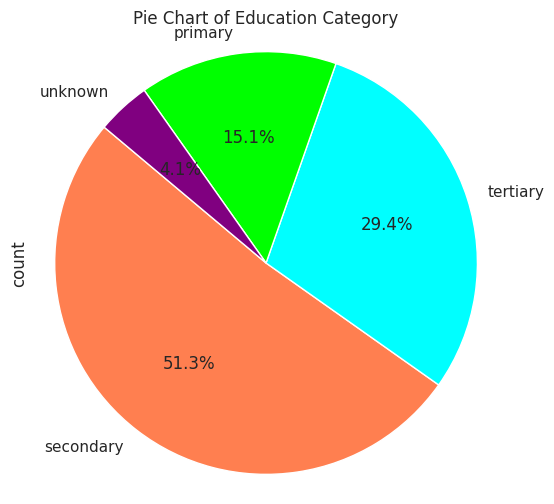

In [ ]:
education_counts = df['education'].value_counts()

custom_colors= ['coral','aqua','lime','purple']
plt.figure(figsize=(6, 6))
education_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=custom_colors)

plt.title('Pie Chart of Education Category')

plt.axis('equal')
plt.show()

#Inference:
# Chart showing count of each type of Education category
# Half of the data contains people with secondary education.

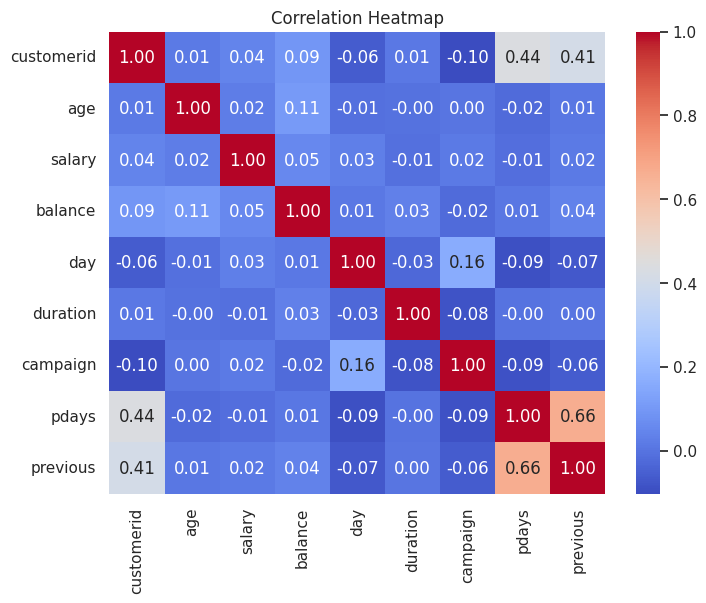

In [ ]:
#Heatmap should be calculted for numeric data

numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

#Inference:
#red signify high corelation btw columns
#1 is the highest
#dark blue signify least

#High corr can have both positive and negative impact:
#positive: indicate that one variable is a good predictor of the other
#Negative: Multicollinearity. Multicollinearity can make it difficult to estimate the individual effects of predictor variables , Redundancy that might lead to repetition.

In [ ]:
# #non-numeric

# # Convert non-numeric data to numeric using one-hot encoding
# data_encoded = pd.get_dummies(df)

# # Calculate correlation matrix
# correlation_matrix = data_encoded.corr()

# # Plot heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap of Non-Numeric Data')
# plt.show()

In [ ]:
df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,job,education,year
0,1,58,100000,2143.0,married,yes,no,yes,no,unknown,...,may,261.0,1,-1,0,unknown,no,management,tertiary,2017
1,2,44,60000,29.0,single,yes,no,yes,no,unknown,...,may,151.0,1,-1,0,unknown,no,technician,secondary,2017
2,3,33,120000,2.0,married,yes,no,yes,yes,unknown,...,may,76.0,1,-1,0,unknown,no,entrepreneur,secondary,2017
3,4,47,20000,1506.0,married,no,no,yes,no,unknown,...,may,92.0,1,-1,0,unknown,no,blue-collar,unknown,2017
4,5,33,0,1.0,single,no,no,no,no,unknown,...,may,198.0,1,-1,0,unknown,no,unknown,unknown,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825.0,married,yes,no,no,no,cellular,...,nov,977.0,3,-1,0,unknown,yes,technician,tertiary,2017
45207,45208,71,55000,1729.0,divorced,yes,no,no,no,cellular,...,nov,456.0,2,-1,0,unknown,yes,retired,primary,2017
45208,45209,72,55000,5715.0,married,yes,no,no,no,cellular,...,nov,1127.0,5,184,3,success,yes,retired,secondary,2017
45209,45210,57,20000,668.0,married,yes,no,no,no,telephone,...,nov,508.0,4,-1,0,unknown,no,blue-collar,secondary,2017


In [ ]:
df.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response       0
job            0
education      0
year          50
dtype: int64

In [ ]:
df['year'].fillna(df['year'].mode()[0], inplace=True)

<ipython-input-351-b64316a30ff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'].fillna(df['year'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
year          0
dtype: int64

In [ ]:
#marital

x=df['marital'].value_counts()
print(x)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[['marital']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['marital']))
df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, one_hot_encoded_df], axis=1)
df.drop(columns=['marital'], inplace=True)


marital
married     27195
single      12782
divorced     5204
Name: count, dtype: int64


In [ ]:
#job

x=df['job'].value_counts()
print(x)

job_data = ['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
label_map = dict(zip(job_data, labels))
df['job_encoded'] = df['job'].map(label_map)

df.drop(columns=['job'], inplace=True)

job
blue-collar      9727
management       9454
technician       7592
admin.           5166
services         4150
retired          2263
self-employed    1575
entrepreneur     1486
unemployed       1303
housemaid        1239
student           938
unknown           288
Name: count, dtype: int64


In [ ]:
df

,customerid,age,salary,balance,targeted,default,housing,loan,contact,day,...,pdays,previous,poutcome,response,education,year,marital_divorced,marital_married,marital_single,job_encoded
0,1,58,100000,2143.0,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,tertiary,2017,0.0,1.0,0.0,2
1,2,44,60000,29.0,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,secondary,2017,0.0,0.0,1.0,3
2,3,33,120000,2.0,yes,no,yes,yes,unknown,5,...,-1,0,unknown,no,secondary,2017,0.0,1.0,0.0,8
3,4,47,20000,1506.0,no,no,yes,no,unknown,5,...,-1,0,unknown,no,unknown,2017,0.0,1.0,0.0,1
4,5,33,0,1.0,no,no,no,no,unknown,5,...,-1,0,unknown,no,unknown,2017,0.0,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45176,45207,51,60000,825.0,yes,no,no,no,cellular,17,...,-1,0,unknown,yes,tertiary,2017,0.0,1.0,0.0,3
45177,45208,71,55000,1729.0,yes,no,no,no,cellular,17,...,-1,0,unknown,yes,primary,2017,1.0,0.0,0.0,6
45178,45209,72,55000,5715.0,yes,no,no,no,cellular,17,...,184,3,success,yes,secondary,2017,0.0,1.0,0.0,6
45179,45210,57,20000,668.0,yes,no,no,no,telephone,17,...,-1,0,unknown,no,secondary,2017,0.0,1.0,0.0,1


In [ ]:
#job

x=df['education'].value_counts()
print(x)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[['education']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['education']))
df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, one_hot_encoded_df], axis=1)
df.drop(columns=['education'], inplace=True)


education
secondary    23189
tertiary     13292
primary       6844
unknown       1856
Name: count, dtype: int64


In [ ]:
df

,customerid,age,salary,balance,targeted,default,housing,loan,contact,day,...,response,year,marital_divorced,marital_married,marital_single,job_encoded,education_primary,education_secondary,education_tertiary,education_unknown
0,1,58,100000,2143.0,yes,no,yes,no,unknown,5,...,no,2017,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0
1,2,44,60000,29.0,yes,no,yes,no,unknown,5,...,no,2017,0.0,0.0,1.0,3,0.0,1.0,0.0,0.0
2,3,33,120000,2.0,yes,no,yes,yes,unknown,5,...,no,2017,0.0,1.0,0.0,8,0.0,1.0,0.0,0.0
3,4,47,20000,1506.0,no,no,yes,no,unknown,5,...,no,2017,0.0,1.0,0.0,1,0.0,0.0,0.0,1.0
4,5,33,0,1.0,no,no,no,no,unknown,5,...,no,2017,0.0,0.0,1.0,12,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45176,45207,51,60000,825.0,yes,no,no,no,cellular,17,...,yes,2017,0.0,1.0,0.0,3,0.0,0.0,1.0,0.0
45177,45208,71,55000,1729.0,yes,no,no,no,cellular,17,...,yes,2017,1.0,0.0,0.0,6,1.0,0.0,0.0,0.0
45178,45209,72,55000,5715.0,yes,no,no,no,cellular,17,...,yes,2017,0.0,1.0,0.0,6,0.0,1.0,0.0,0.0
45179,45210,57,20000,668.0,yes,no,no,no,telephone,17,...,no,2017,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45181 entries, 0 to 45180
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           45181 non-null  int64  
 1   age                  45181 non-null  int64  
 2   salary               45181 non-null  int64  
 3   balance              45181 non-null  float64
 4   targeted             45181 non-null  object 
 5   default              45181 non-null  object 
 6   housing              45181 non-null  object 
 7   loan                 45181 non-null  object 
 8   contact              45181 non-null  object 
 9   day                  45181 non-null  int64  
 10  month                45181 non-null  object 
 11  duration             45181 non-null  float64
 12  campaign             45181 non-null  int64  
 13  pdays                45181 non-null  int64  
 14  previous             45181 non-null  int64  
 15  poutcome             45181 non-null 

In [ ]:
df

,customerid,age,salary,balance,targeted,default,housing,loan,contact,day,...,response,year,marital_divorced,marital_married,marital_single,job_encoded,education_primary,education_secondary,education_tertiary,education_unknown
0,1,58,100000,2143.0,yes,no,yes,no,unknown,5,...,no,2017,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0
1,2,44,60000,29.0,yes,no,yes,no,unknown,5,...,no,2017,0.0,0.0,1.0,3,0.0,1.0,0.0,0.0
2,3,33,120000,2.0,yes,no,yes,yes,unknown,5,...,no,2017,0.0,1.0,0.0,8,0.0,1.0,0.0,0.0
3,4,47,20000,1506.0,no,no,yes,no,unknown,5,...,no,2017,0.0,1.0,0.0,1,0.0,0.0,0.0,1.0
4,5,33,0,1.0,no,no,no,no,unknown,5,...,no,2017,0.0,0.0,1.0,12,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45176,45207,51,60000,825.0,yes,no,no,no,cellular,17,...,yes,2017,0.0,1.0,0.0,3,0.0,0.0,1.0,0.0
45177,45208,71,55000,1729.0,yes,no,no,no,cellular,17,...,yes,2017,1.0,0.0,0.0,6,1.0,0.0,0.0,0.0
45178,45209,72,55000,5715.0,yes,no,no,no,cellular,17,...,yes,2017,0.0,1.0,0.0,6,0.0,1.0,0.0,0.0
45179,45210,57,20000,668.0,yes,no,no,no,telephone,17,...,no,2017,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0


In [ ]:
#targeted

x=df['targeted'].value_counts()
print(x)
df.loc[df['targeted']=='yes','targeted']=1
df.loc[df['targeted']=='no','targeted']=0
x=df['targeted'].value_counts()
print(x)

targeted
yes    37067
no      8114
Name: count, dtype: int64
targeted
1    37067
0     8114
Name: count, dtype: int64


In [ ]:
#default(Specifies defaulted loan)

x=df['default'].value_counts()
print(x)
df.loc[df['default']=='yes','default']=1
df.loc[df['default']=='no','default']=0
x=df['default'].value_counts()
print(x)

default
no     44366
yes      815
Name: count, dtype: int64
default
0    44366
1      815
Name: count, dtype: int64


In [ ]:
#housing loan

x=df['housing'].value_counts()
print(x)
df.loc[df['housing']=='yes','housing']=1
df.loc[df['housing']=='no','housing']=0
x=df['housing'].value_counts()
print(x)

housing
yes    25112
no     20069
Name: count, dtype: int64
housing
1    25112
0    20069
Name: count, dtype: int64


In [ ]:
#loan

x=df['loan'].value_counts()
print(x)
df.loc[df['loan']=='yes','loan']=1
df.loc[df['loan']=='no','loan']=0
x=df['loan'].value_counts()
print(x)

loan
no     37943
yes     7238
Name: count, dtype: int64
loan
0    37943
1     7238
Name: count, dtype: int64


In [ ]:
#contact

x=df['contact'].value_counts()
print(x)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[['contact']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['contact']))
df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, one_hot_encoded_df], axis=1)
df.drop(columns=['contact'], inplace=True)

contact
cellular     29267
unknown      13010
telephone     2904
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['month_encoded'] = label_encoder.fit_transform(df['month'])
df.drop(columns=['month'], inplace=True)

In [ ]:
x=df['poutcome'].value_counts()
print(x)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df.drop(columns=['poutcome'], inplace=True)

poutcome
unknown    36935
failure     4897
other       1839
success     1510
Name: count, dtype: int64


In [ ]:
x=df['response'].value_counts()
print(x)
df.loc[df['response']=='yes','response']=1
df.loc[df['response']=='no','response']=0
x=df['response'].value_counts()
print(x)

response
no     39894
yes     5287
Name: count, dtype: int64
response
0    39894
1     5287
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45181 entries, 0 to 45180
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           45181 non-null  int64  
 1   age                  45181 non-null  int64  
 2   salary               45181 non-null  int64  
 3   balance              45181 non-null  float64
 4   targeted             45181 non-null  object 
 5   default              45181 non-null  object 
 6   housing              45181 non-null  object 
 7   loan                 45181 non-null  object 
 8   day                  45181 non-null  int64  
 9   duration             45181 non-null  float64
 10  campaign             45181 non-null  int64  
 11  pdays                45181 non-null  int64  
 12  previous             45181 non-null  int64  
 13  response             45181 non-null  object 
 14  year                 45181 non-null  object 
 15  marital_divorced     45181 non-null 

In [ ]:
columns_to_convert = ['targeted', 'default', 'housing','loan','response','year']
df[columns_to_convert] = df[columns_to_convert].astype('int')

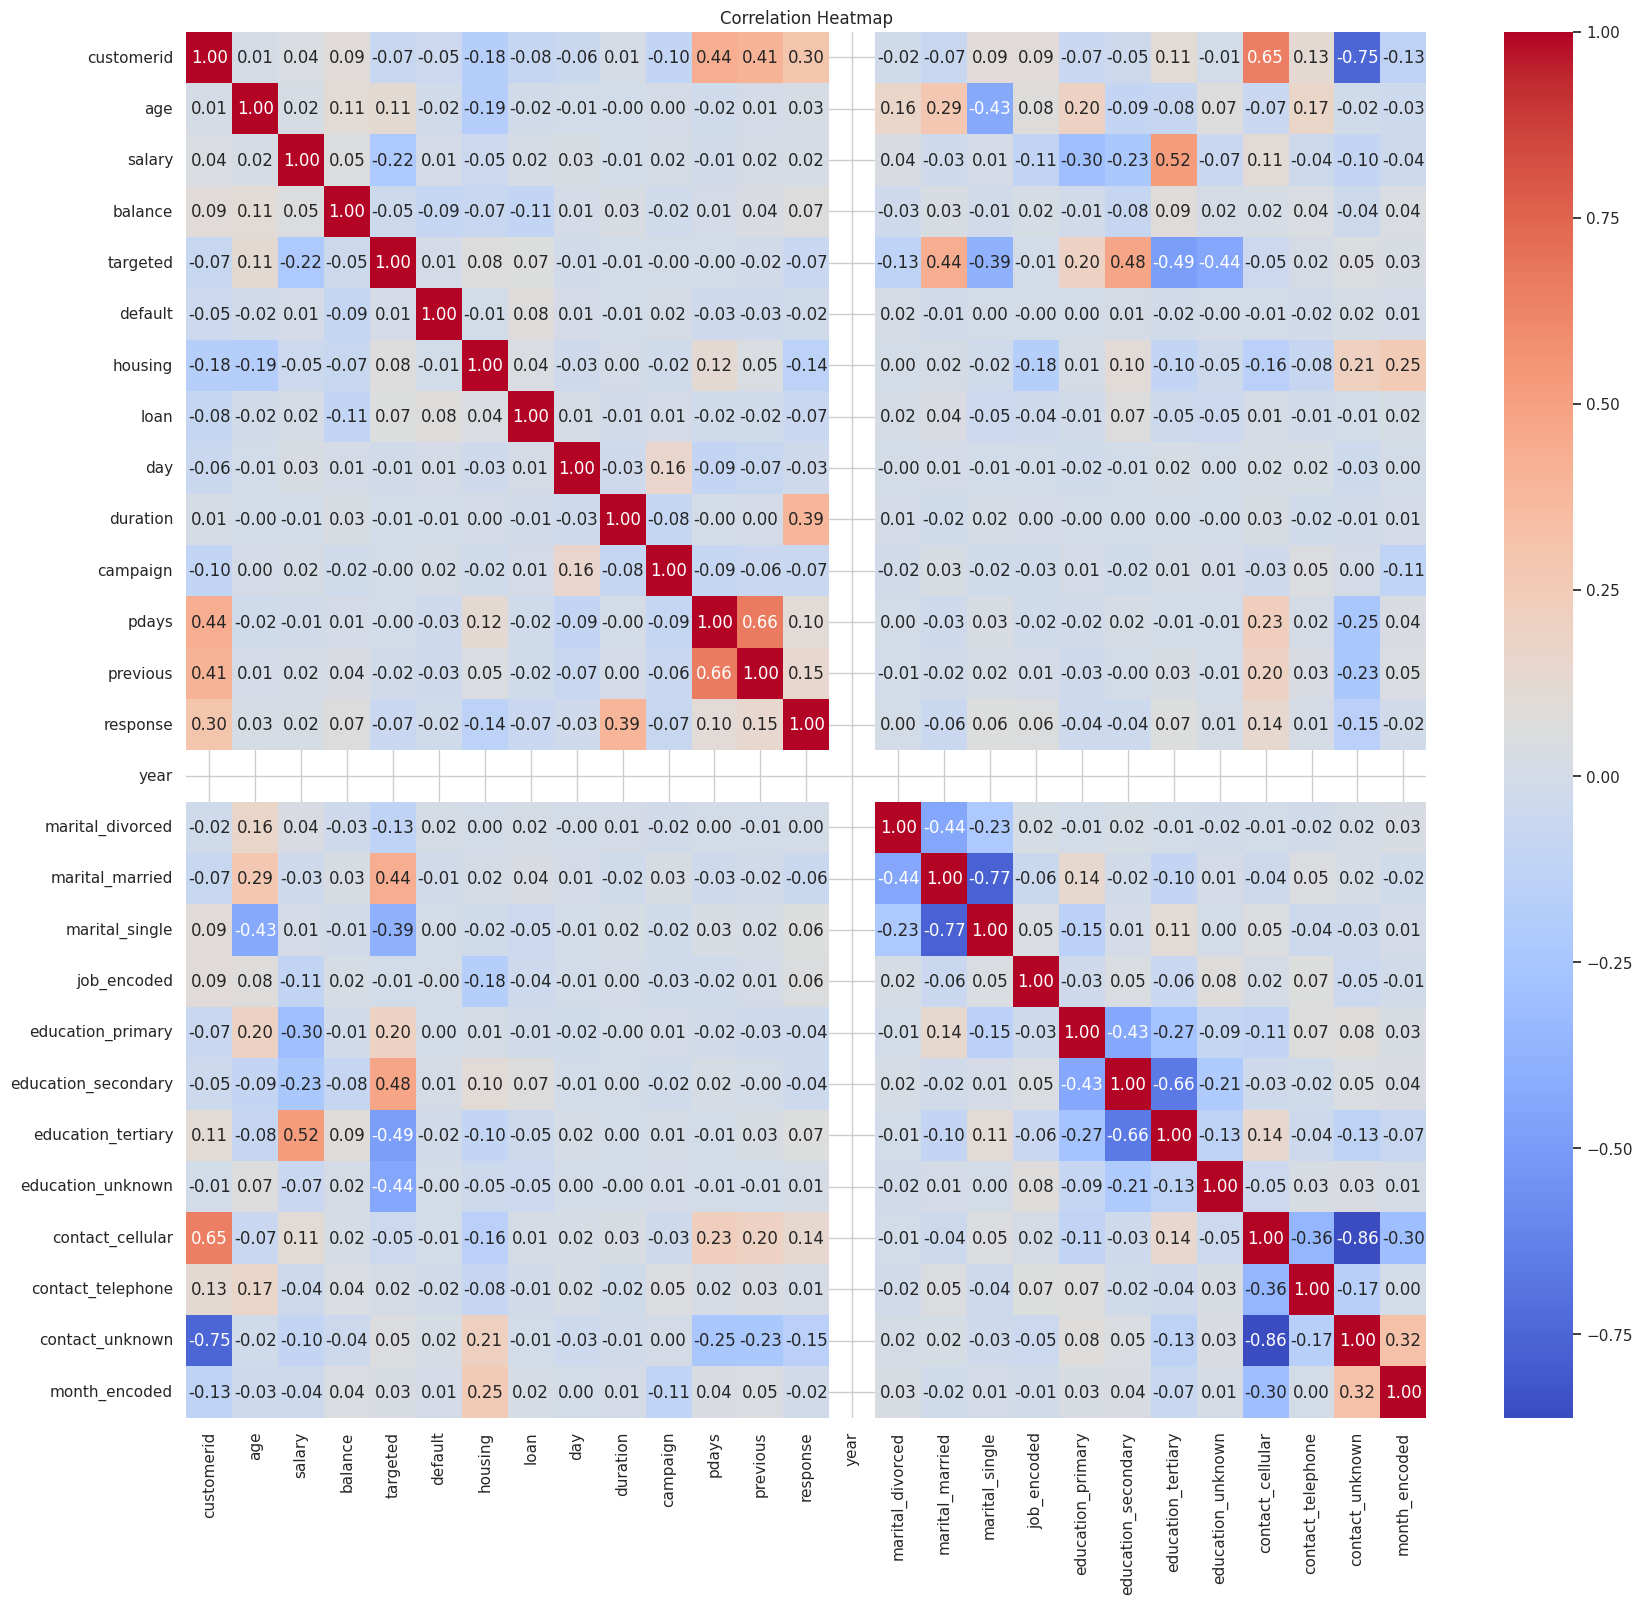

In [ ]:
corr_matrix =df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

#Inference:
# Column year is white and blank, which means it does not have much correlation with other column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45181 entries, 0 to 45180
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           45181 non-null  int64  
 1   age                  45181 non-null  int64  
 2   salary               45181 non-null  int64  
 3   balance              45181 non-null  float64
 4   targeted             45181 non-null  int64  
 5   default              45181 non-null  int64  
 6   housing              45181 non-null  int64  
 7   loan                 45181 non-null  int64  
 8   day                  45181 non-null  int64  
 9   duration             45181 non-null  float64
 10  campaign             45181 non-null  int64  
 11  pdays                45181 non-null  int64  
 12  previous             45181 non-null  int64  
 13  response             45181 non-null  int64  
 14  year                 45181 non-null  int64  
 15  marital_divorced     45181 non-null 

CLUSTERING

In [ ]:
# X = df.drop(columns=['response'])
# y = df['response']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

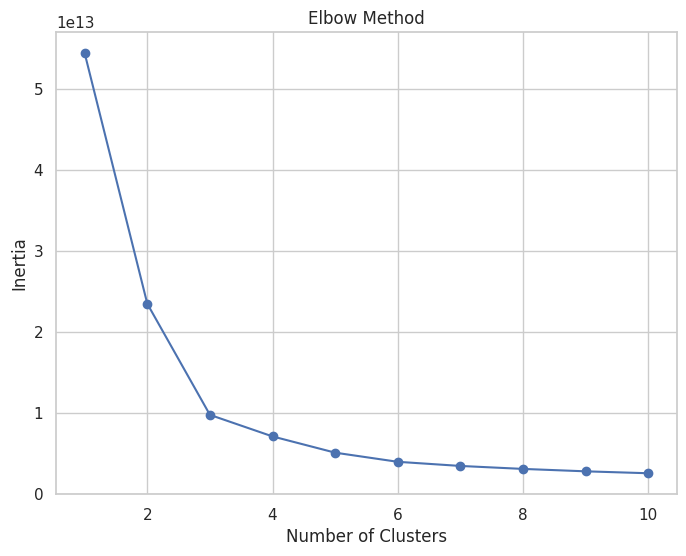

In [ ]:
# from sklearn.cluster import KMeans

# # Elbow Method to find the optimal number of clusters
# inertia = []
# for n_clusters in range(1, 11):
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# # Plotting the Elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()



# #k=3

In [ ]:
# # Clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# cluster_labels = kmeans.fit_predict(X)

# # Add cluster labels as a new feature
# X['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['response'])
y = df['response']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with cross-validation on the training and validation sets
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Predict on the validation set using the best model found
y_val_pred = best_rf_classifier.predict(X_val)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy after tuning:", val_accuracy)

# Finally, predict on the test set using the best model found
y_test_pred = best_rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy after tuning:", test_accuracy)


In [ ]:
from xgboost import XGBClassifier
X = df.drop(columns=['response'])
y = df['response']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with cross-validation on the training and validation sets
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_xgb_classifier = grid_search.best_estimator_

# Predict on the validation set using the best model found
y_val_pred = best_xgb_classifier.predict(X_val)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy after tuning:", val_accuracy)

# Finally, predict on the test set using the best model found
y_test_pred = best_xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy after tuning:", test_accuracy)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred1 = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9078233927188226


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9105897974991701


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45181 entries, 0 to 45180
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           45181 non-null  int64  
 1   age                  45181 non-null  int64  
 2   salary               45181 non-null  int64  
 3   balance              45181 non-null  float64
 4   targeted             45181 non-null  int64  
 5   default              45181 non-null  int64  
 6   housing              45181 non-null  int64  
 7   loan                 45181 non-null  int64  
 8   day                  45181 non-null  int64  
 9   duration             45181 non-null  float64
 10  campaign             45181 non-null  int64  
 11  pdays                45181 non-null  int64  
 12  previous             45181 non-null  int64  
 13  response             45181 non-null  int64  
 14  year                 45181 non-null  int64  
 15  marital_divorced     45181 non-null 

In [ ]:
# # Define values for each feature in the new data point
# new_data = {
#     'customerid': 9999,
#     'age': 35,
#     'salary': 60000,
#     'balance': 5000,
#     'targeted': 1,
#     'default': 1,
#     'housing': 1,
#     'loan': 0,
#     'day': 15,
#     'duration': 300,
#     'campaign': 2,
#     'pdays': 999,
#     'previous': 0,
#     'year': 2024,
#     'marital_divorced': 0,
#     'marital_married': 1,  # Assuming the person is married
#     'marital_single': 0,
#     'job_encoded': 2,  # Assuming the job_encoded value
#     'education_primary': 0,
#     'education_secondary': 1,  # Assuming secondary education
#     'education_tertiary': 0,
#     'education_unknown': 0,
#     'contact_cellular': 1,  # Assuming contact is cellular
#     'contact_telephone': 0,
#     'contact_unknown': 0,
#     'month_encoded': 5,
#     'Cluster': 1
# }

# # Convert the dictionary to a DataFrame
# new_data_df = pd.DataFrame([new_data])

# # Output the new data point
# print("New Data Point:")
# print(new_data_df)
# new_prediction = model.predict(new_data_df)
# print("Prediction for the new data point:", new_prediction[0])

New Data Point:
   customerid  age  salary  balance  targeted  default  housing  loan  day  \
0        9999   35   60000     5000         1        1        1     0   15   

   duration  ...  job_encoded  education_primary  education_secondary  \
0       300  ...            2                  0                    1   

   education_tertiary  education_unknown  contact_cellular  contact_telephone  \
0                   0                  0                 1                  0   

   contact_unknown  month_encoded  Cluster  
0                0              5        1  

[1 rows x 27 columns]
Prediction for the new data point: 0


In [ ]:
# # Define values for each feature in the new data point
# new_data = {
#     'customerid': 45111,
#     'age': 30,
#     'salary': 50000,
#     'balance': 2000,
#     'targeted': 1,
#     'default': 0,
#     'housing': 1,
#     'loan': 0,
#     'day': 5,
#     'duration': 300,
#     'campaign': 0,
#     'pdays': 0,
#     'previous': 0,
#     'year': 2024,
#     'marital_divorced': 0,
#     'marital_married': 1,  # Assuming the person is married
#     'marital_single': 0,
#     'job_encoded': 2,  # Assuming the job_encoded value
#     'education_primary': 0,
#     'education_secondary': 0,  # Assuming secondary education
#     'education_tertiary': 1,
#     'education_unknown': 0,
#     'contact_cellular': 1,  # Assuming contact is cellular
#     'contact_telephone': 0,
#     'contact_unknown': 0,
#     'month_encoded': 5
# }

# # Convert the dictionary to a DataFrame
# new_data_df = pd.DataFrame([new_data])

# # Output the new data point
# print("New Data Point:")
# print(new_data_df)
# new_prediction = model.predict(new_data_df)
# print("Prediction for the new data point:", new_prediction[0])

New Data Point:
   customerid  age  salary  balance  targeted  default  housing  loan  day  \
0       45111   30   50000     2000         1        0        1     0    5   

   duration  ...  job_encoded  education_primary  education_secondary  \
0       300  ...            2                  0                    0   

   education_tertiary  education_unknown  contact_cellular  contact_telephone  \
0                   1                  0                 1                  0   

   contact_unknown  month_encoded  Cluster  
0                0              5        1  

[1 rows x 27 columns]
Prediction for the new data point: 0


In [ ]:
# # Define values for each feature in the new data point
# new_data = {
#     'customerid': 45111,
#     'age': 30,
#     'salary': 50000,
#     'balance': 2000,
#     'targeted': 1,
#     'default': 0,
#     'housing': 1,
#     'loan': 0,
#     'day': 5,
#     'duration': 300,
#     'campaign': 0,
#     'pdays': 0,
#     'previous': 0,
#     'year': 2024,
#     'marital_divorced': 0,
#     'marital_married': 1,  # Assuming the person is married
#     'marital_single': 0,
#     'job_encoded': 2,  # Assuming the job_encoded value
#     'education_primary': 0,
#     'education_secondary': 0,  # Assuming secondary education
#     'education_tertiary': 1,
#     'education_unknown': 0,
#     'contact_cellular': 1,  # Assuming contact is cellular
#     'contact_telephone': 0,
#     'contact_unknown': 0,
#     'month_encoded': 5
# }

# # Convert the dictionary to a DataFrame
# new_data_df = pd.DataFrame([new_data])

# # Output the new data point
# print("New Data Point:")
# print(new_data_df)
# new_prediction = model.predict(new_data_df)
# print("Prediction for the new data point:", new_prediction[0])